In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import LocalOutlierFactor

%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [2]:
data = sns.load_dataset("diamonds")
data = data.select_dtypes(include = ["float64","int64"])

In [3]:
df = data.copy()

In [4]:
df = df.dropna()

In [5]:
df.head()

,carat,depth,table,price,x,y,z
0,0.23,61.5,55.0,326,3.95,3.98,2.43
1,0.21,59.8,61.0,326,3.89,3.84,2.31
2,0.23,56.9,65.0,327,4.05,4.07,2.31
3,0.29,62.4,58.0,334,4.20,4.23,2.63
4,0.31,63.3,58.0,335,4.34,4.35,2.75


In [6]:
df_table = df["table"]

In [7]:
df_table.head()

0    55.0
1    61.0
2    65.0
3    58.0
4    58.0
Name: table, dtype: float64

In [8]:
sns.set_theme()
sns.set(rc={"figure.dpi":200})

<AxesSubplot:xlabel='table'>

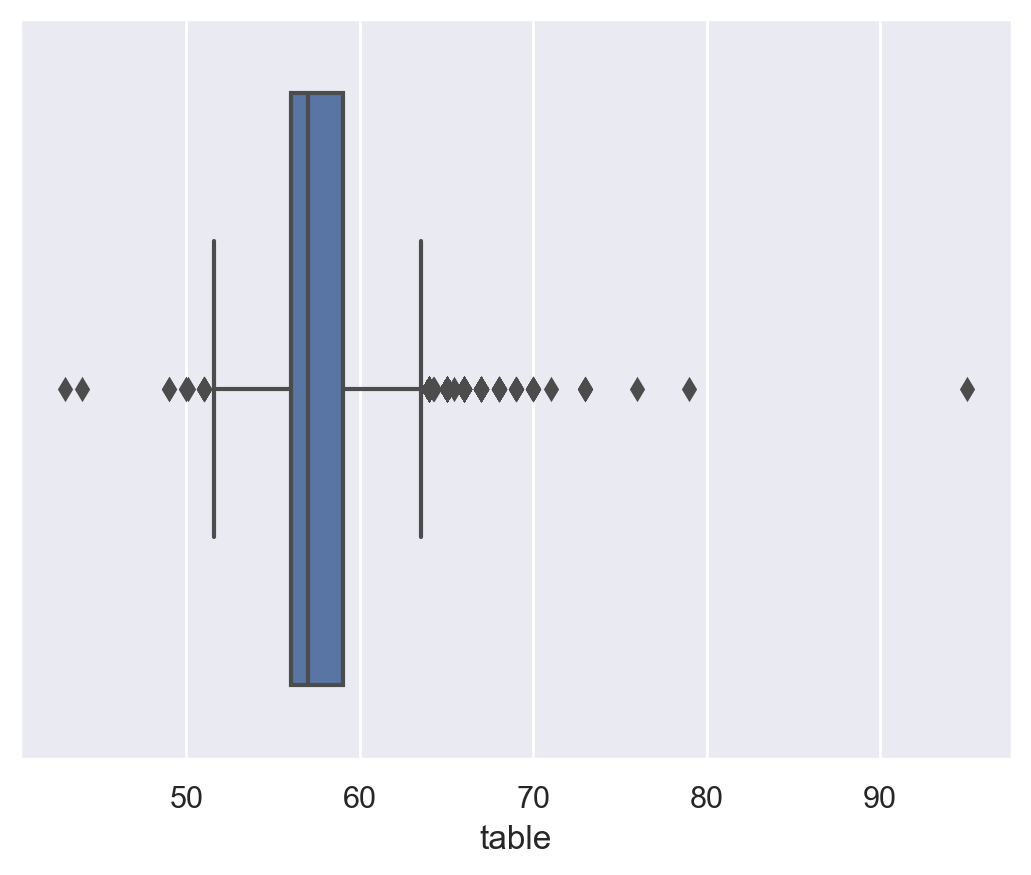

In [9]:
sns.boxplot(x = df_table)

In [10]:
clf = LocalOutlierFactor(n_neighbors = 20, contamination=0.1)

In [11]:
clf.fit_predict(df)

array([-1, -1, -1, ...,  1,  1,  1])

In [12]:
df_scores = clf.negative_outlier_factor_

In [13]:
df_scores[0:10]

array([-1.58352526, -1.59732899, -1.62278873, -1.33002541, -1.30712521,
       -1.28408436, -1.28428162, -1.26458706, -1.28422952, -1.27351342])

In [14]:
np.sort(df_scores)[0:20]

array([-8.60430658, -8.20889984, -5.86084355, -4.98415175, -4.81502092,
       -4.81502092, -4.61522833, -4.37081214, -4.29842288, -4.10492387,
       -4.0566648 , -4.01831733, -3.94882806, -3.82378797, -3.80135297,
       -3.75680919, -3.65947378, -3.59249261, -3.55564138, -3.47157375])

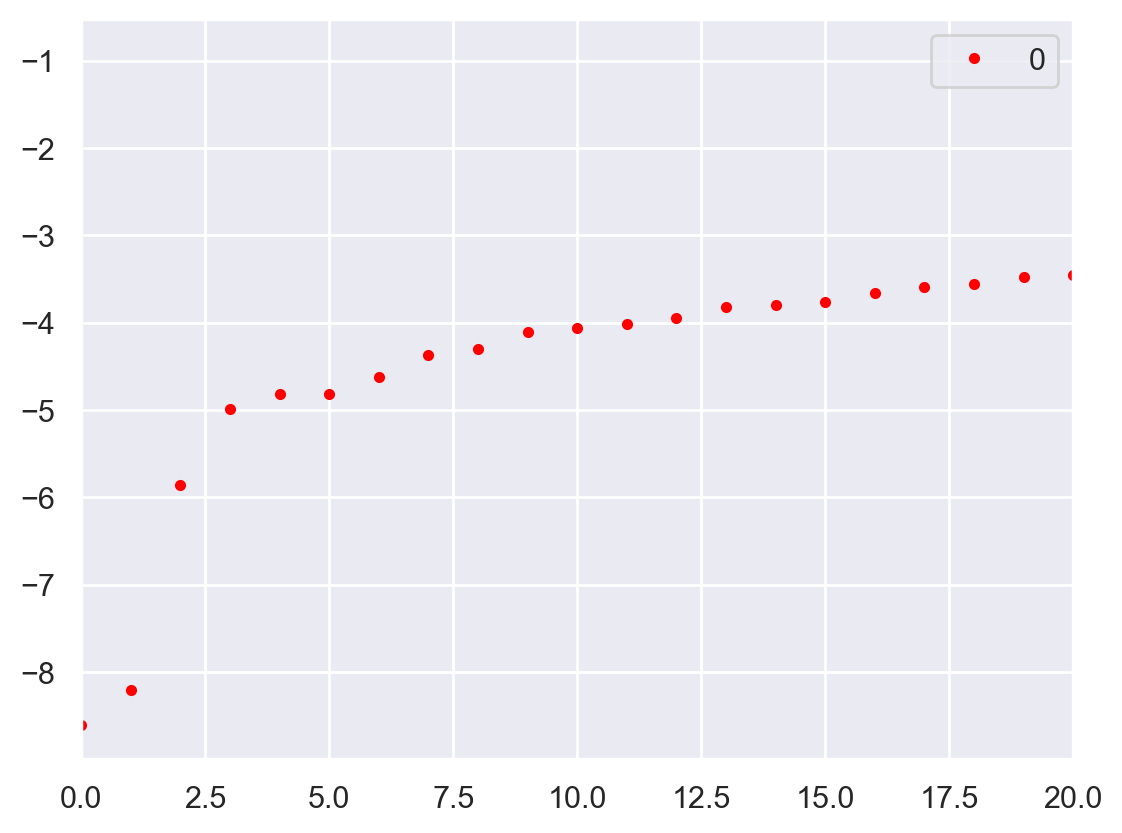

In [15]:
scores = pd.DataFrame(np.sort(df_scores))
scores.plot(stacked=True,xlim=[0,20],style=".",color="red")
plt.show()

In [16]:
tf = np.sort(df_scores)[3]

In [17]:
print_value = df[df_scores == tf]

In [18]:
anomaly_tf= df[df_scores > tf]

In [19]:
res = anomaly_tf.to_records(index=False)

In [20]:
res[:] = print_value.to_records(index=False)

In [21]:
res

rec.array([(0.81, 68.8, 79., 2301, 5.26, 5.2, 3.58),
           (0.81, 68.8, 79., 2301, 5.26, 5.2, 3.58),
           (0.81, 68.8, 79., 2301, 5.26, 5.2, 3.58), ...,
           (0.81, 68.8, 79., 2301, 5.26, 5.2, 3.58),
           (0.81, 68.8, 79., 2301, 5.26, 5.2, 3.58),
           (0.81, 68.8, 79., 2301, 5.26, 5.2, 3.58)],
          dtype=[('carat', '<f8'), ('depth', '<f8'), ('table', '<f8'), ('price', '<i8'), ('x', '<f8'), ('y', '<f8'), ('z', '<f8')])

In [22]:
tf_index = df[df_scores > tf].index

In [23]:
df[df_scores > tf] = pd.DataFrame(res,index=tf_index)